In [1]:
from dotenv import load_dotenv
from datetime import datetime
from langchain_core.tools import tool
from langchain_core.messages import SystemMessage
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import create_react_agent
from IPython.display import Image, display
from langgraph.checkpoint.memory import InMemorySaver

load_dotenv()

True

In [2]:
@tool(parse_docstring=True)
def get_all_rooms() -> list:
    """Get a list of all available meeting rooms.

    Returns:
        list: A list of all available meeting rooms.
    """
    return ["Room 1", "Room 2", "Room 3", "888 Multimedia Conference Room"]


@tool(parse_docstring=True)
def get_available_rooms(start_time: str, end_time: str) -> list:
    """Get a list of all available meeting rooms during the specified time period.

    Args:
        start_time (str): The start time of the booking (e.g., "2025-02-23 14:00").
        end_time (str): The end time of the booking (e.g., "2025-02-23 15:00").

    Returns:
        list: A list of all available meeting rooms during the specified time period.
    """
    return ["Room 1", "Room 2"]


@tool(parse_docstring=True)
def book_room(name: str, start_time: str, end_time: str) -> str:
    """Book a specified meeting room for the user, only after the user confirms the details.

    Args:
        name (str): The name of the meeting room to be booked.
        start_time (str): The start time of the booking (e.g., "2025-02-23 14:00").
        end_time (str): The end time of the booking (e.g., "2025-02-23 15:00").

    Returns:
        str: A message indicating whether the booking was successful or failed.
    """
    if name in ["Room 1", "Room 2", "Room 3", "888 Multimedia Conference Room"]:
        if name in ["Room 1", "Room 2"]:
            return "Booking successful"
        else:
            return "The room is not available"
    else:
        return "Invalid room name"

In [3]:
tools = [get_all_rooms, get_available_rooms, book_room]
llm = ChatOpenAI(model="qwen-plus")
memory = InMemorySaver()
prompt = SystemMessage(
    f"You are an AI assistant. The current time is: {datetime.now().strftime('%Y-%m-%d %H:%M')}. "
    f"Please assist the user in booking a meeting room by confirming the meeting time and room step by step. "
    f"Keep your language as concise as possible.\n"
    f"The most important thing is that before using book_room, make sure to confirm the information with the user. Do not skip this step."
    f"Only proceed with book_room if everything is correct. Do not skip this step."
)
agent = create_react_agent(llm, tools, checkpointer=memory, prompt=prompt)

In [4]:
prompt.pretty_print()

================================ System Message ================================

You are an AI assistant. The current time is: 2025-11-21 17:18. Please assist the user in booking a meeting room by confirming the meeting time and room step by step. Keep your language as concise as possible.
The most important thing is that before using book_room, make sure to confirm the information with the user. Do not skip this step.Only proceed with book_room if everything is correct. Do not skip this step.


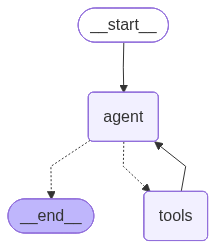

In [5]:
display(Image(agent.get_graph().draw_mermaid_png()))

## 会议室预订案例1

In [6]:
config = {"configurable": {"thread_id": "abc123"}}
result = agent.invoke(
    {"messages": [{"role": "user", "content": "帮我预定一个会议室"}]},
    config=config
)
for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

帮我预定一个会议室
================================== Ai Message ==================================

请问您需要预定什么时间的会议室？请提供具体的开始时间和结束时间。


In [7]:
config = {"configurable": {"thread_id": "abc123"}}
result = agent.invoke(
    {"messages": [{"role": "user", "content": "明天上午10点到11点"}]},
    config=config
)
for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

帮我预定一个会议室
================================== Ai Message ==================================

请问您需要预定什么时间的会议室？请提供具体的开始时间和结束时间。
================================ Human Message =================================

明天上午10点到11点
================================== Ai Message ==================================
Tool Calls:
  get_available_rooms (call_77672c0d3b1b4d299f3e77)
 Call ID: call_77672c0d3b1b4d299f3e77
  Args:
    start_time: 2025-11-22 10:00
    end_time: 2025-11-22 11:00
================================= Tool Message =================================
Name: get_available_rooms

["Room 1", "Room 2"]
================================== Ai Message ==================================

明天上午10:00到11:00，可用的会议室有：Room 1 和 Room 2。

请问您想预定哪一个？


In [8]:
config = {"configurable": {"thread_id": "abc123"}}
result = agent.invoke(
    {"messages": [{"role": "user", "content": "第一个"}]},
    config=config
)
for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

帮我预定一个会议室
================================== Ai Message ==================================

请问您需要预定什么时间的会议室？请提供具体的开始时间和结束时间。
================================ Human Message =================================

明天上午10点到11点
================================== Ai Message ==================================
Tool Calls:
  get_available_rooms (call_77672c0d3b1b4d299f3e77)
 Call ID: call_77672c0d3b1b4d299f3e77
  Args:
    start_time: 2025-11-22 10:00
    end_time: 2025-11-22 11:00
================================= Tool Message =================================
Name: get_available_rooms

["Room 1", "Room 2"]
================================== Ai Message ==================================

明天上午10:00到11:00，可用的会议室有：Room 1 和 Room 2。

请问您想预定哪一个？
================================ Human Message =================================

第一个
================================== Ai Message ==================================

您想预定的是 Room 

In [9]:
config = {"configurable": {"thread_id": "abc123"}}
result = agent.invoke(
    {"messages": [{"role": "user", "content": "确认"}]},
    config=config
)
for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

帮我预定一个会议室
================================== Ai Message ==================================

请问您需要预定什么时间的会议室？请提供具体的开始时间和结束时间。
================================ Human Message =================================

明天上午10点到11点
================================== Ai Message ==================================
Tool Calls:
  get_available_rooms (call_77672c0d3b1b4d299f3e77)
 Call ID: call_77672c0d3b1b4d299f3e77
  Args:
    start_time: 2025-11-22 10:00
    end_time: 2025-11-22 11:00
================================= Tool Message =================================
Name: get_available_rooms

["Room 1", "Room 2"]
================================== Ai Message ==================================

明天上午10:00到11:00，可用的会议室有：Room 1 和 Room 2。

请问您想预定哪一个？
================================ Human Message =================================

第一个
================================== Ai Message ==================================

您想预定的是 Room 

## 会议室预订案例2

In [10]:
config = {"configurable": {"thread_id": "abc1235"}}
result = agent.invoke(
    {"messages": [{"role": "user", "content": "帮我订明天上午10点到11点1号会议室"}]},
    config=config
)
for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

帮我订明天上午10点到11点1号会议室
================================== Ai Message ==================================
Tool Calls:
  get_available_rooms (call_cdf4328cfdf7422a98468b)
 Call ID: call_cdf4328cfdf7422a98468b
  Args:
    start_time: 2025-11-22 10:00
    end_time: 2025-11-22 11:00
================================= Tool Message =================================
Name: get_available_rooms

["Room 1", "Room 2"]
================================== Ai Message ==================================

您想预订明天上午10:00到11:00的1号会议室，时间与房间都可用。确认要预订吗？


## 会议室预订案例3

In [11]:
config = {"configurable": {"thread_id": "abc12345"}}
result = agent.invoke(
    {"messages": [{"role": "user", "content": "帮我订1号会议室"}]},
    config=config
)
for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

帮我订1号会议室
================================== Ai Message ==================================

为了帮您预订1号会议室，请先提供以下信息：
- 会议开始时间（格式：YYYY-MM-DD HH:MM）
- 会议结束时间（格式：YYYY-MM-DD HH:MM）


In [12]:
config = {"configurable": {"thread_id": "abc12345"}}
result = agent.invoke(
    {"messages": [{"role": "user", "content": "明天下午2点至4点"}]},
    config=config
)
for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

帮我订1号会议室
================================== Ai Message ==================================

为了帮您预订1号会议室，请先提供以下信息：
- 会议开始时间（格式：YYYY-MM-DD HH:MM）
- 会议结束时间（格式：YYYY-MM-DD HH:MM）
================================ Human Message =================================

明天下午2点至4点
================================== Ai Message ==================================
Tool Calls:
  get_available_rooms (call_e3223cfd98474eb9b83cb5)
 Call ID: call_e3223cfd98474eb9b83cb5
  Args:
    start_time: 2025-11-22 14:00
    end_time: 2025-11-22 16:00
================================= Tool Message =================================
Name: get_available_rooms

["Room 1", "Room 2"]
================================== Ai Message ==================================

1号会议室在明天下午2点至4点可用。确认信息：
- 会议室：1号会议室
- 时间：2025年11月22日 14:00 - 16:00

是否现在为您预订？


In [13]:
config = {"configurable": {"thread_id": "abc12345"}}
result = agent.invoke(
    {"messages": [{"role": "user", "content": "确认"}]},
    config=config
)
for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

帮我订1号会议室
================================== Ai Message ==================================

为了帮您预订1号会议室，请先提供以下信息：
- 会议开始时间（格式：YYYY-MM-DD HH:MM）
- 会议结束时间（格式：YYYY-MM-DD HH:MM）
================================ Human Message =================================

明天下午2点至4点
================================== Ai Message ==================================
Tool Calls:
  get_available_rooms (call_e3223cfd98474eb9b83cb5)
 Call ID: call_e3223cfd98474eb9b83cb5
  Args:
    start_time: 2025-11-22 14:00
    end_time: 2025-11-22 16:00
================================= Tool Message =================================
Name: get_available_rooms

["Room 1", "Room 2"]
================================== Ai Message ==================================

1号会议室在明天下午2点至4点可用。确认信息：
- 会议室：1号会议室
- 时间：2025年11月22日 14:00 - 16:00

是否现在为您预订？
================================ Human Message =================================

确认
========================